# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning I</font>

# Inception Model

https://www.tensorflow.org/tutorials/image_recognition

https://arxiv.org/abs/1512.00567

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## Introdução

Este jupyter notebook mostra como usar uma rede Deep Neural Convolucional pré-treinada chamada Inception v3 para classificação de imagem.

O modelo Inception v3 leva semanas para treinar em um super computador com 8 GPUs Tesla K40 que provavelmente custa US$ 30.000 por isso é impossível treiná-lo em um PC comum. Em vez disso, baixaremos o modelo pré-treinado do Inception e usamos para classificar imagens. Usaremos o super computador da DSA e recomendamos que você faça o mesmo.

O modelo Inception v3 tem quase 25 milhões de parâmetros e usa 5 bilhões de operações de multiplicação para classificar uma única imagem. Em um PC moderno sem GPU isso pode ser feito em uma fração de segundo por imagem.

Os detalhes da implementação estão no arquivo inception.py que você encontra em anexo.

In [2]:
# Verificando se a GPU tem memória disponível
!nvidia-smi

Sun May  3 15:41:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    On   | 00000000:05:00.0 Off |                  N/A |
| 24%   42C    P8     9W / 250W |    114MiB / 12194MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:09:00.0 Off |                  N/A |
| 23%   37C    P8     9W / 250W |      2MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

## Flowchart

O diagrama a seguir mostra como os dados circulam no modelo Inception v3, que é uma Rede Neural Convolucional com muitas camadas e uma estrutura complicada. O [documento de pesquisa] (http://arxiv.org/pdf/1512.00567v3.pdf) fornece mais detalhes sobre como o modelo Inception foi construído e por que ele foi projetado desse jeito. Mas os autores admitem que eles não entendem por que funciona.

Observe que o modelo Inception tem duas saídas softmax. Um é usado durante o treinamento da rede neural e o outro é usado para classificar imagens após a conclusão do treinamento, também conhecido como inferência.

[Novos modelos] (https://research.googleblog.com/2016/08/improving-inception-and-image.html) ficaram disponíveis recentemente, e são ainda mais complicados do que o Inception v3 e conseguem uma precisão de classificação um pouco melhor.

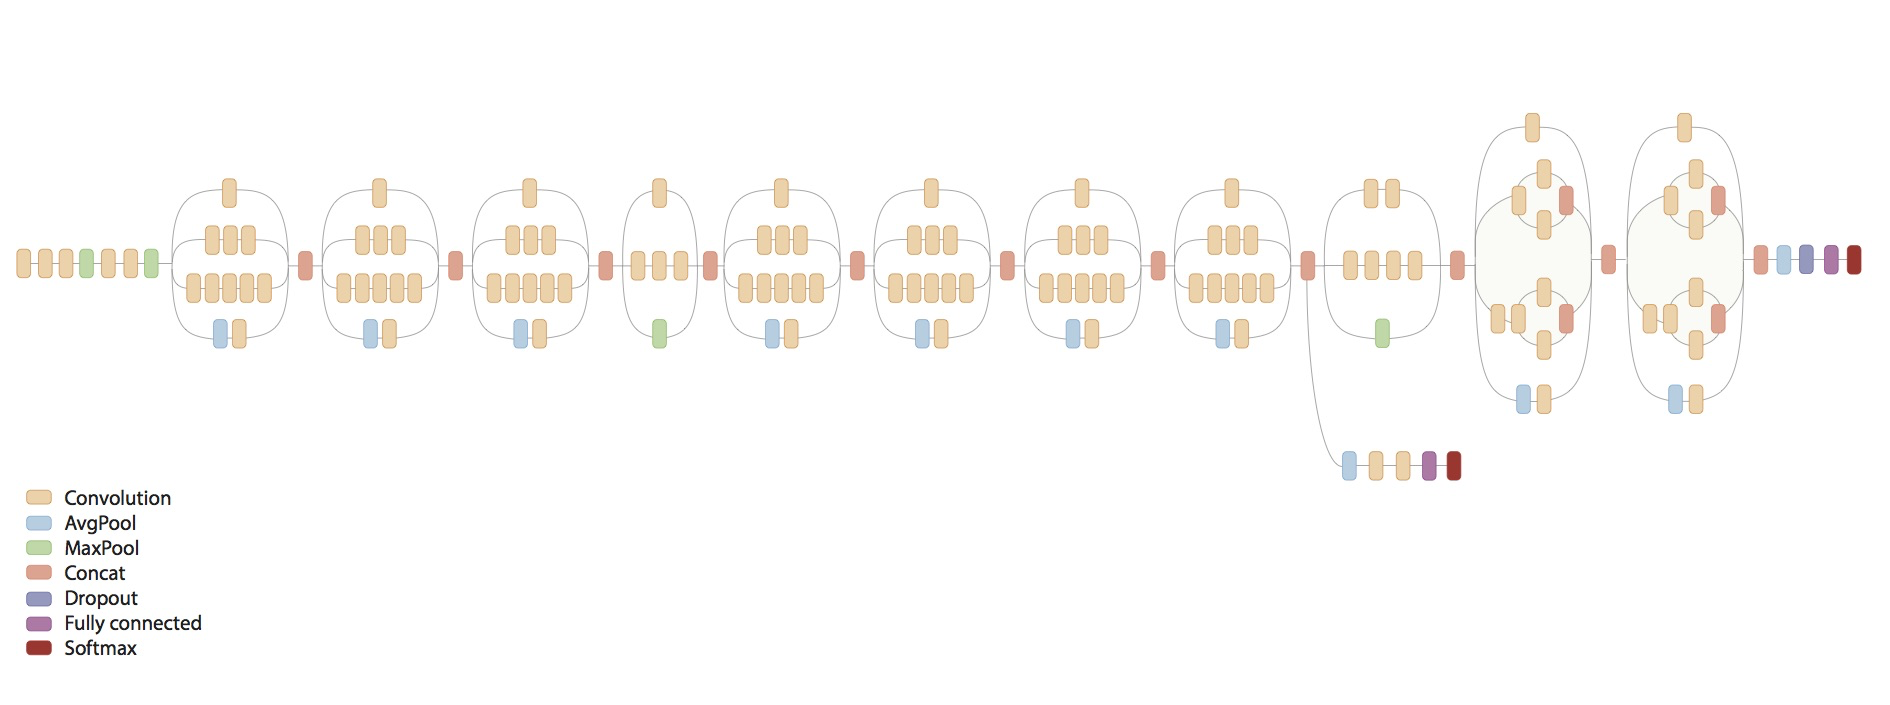

In [6]:
from IPython.display import Image, display
Image('images/inception_flowchart.png')

## Imports

In [4]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
import numpy as np
import os

# Funções e Classes para o Inception model.
import inception

Usamos Python 3.7 com TensorFlow:

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

tensorflow 2.1.0
matplotlib 3.2.1
numpy      1.18.2
Data Science Academy


## Download do Inception Model

O modelo Inception é baixado da internet. Download dos dados para o modelo Inception se ele ainda não existir no diretório. São 85 MB.

In [2]:
inception.maybe_download()

- Download em andamento: 100.0%
Download concluído. Extraindo os arquivos.
Feito.


## Carregando o Inception Model

Carregando o modelo Inception para que esteja pronto para classificar imagens. Observe o aviso de warning, que pode fazer com que o programa falhe no futuro.

In [3]:
model = inception.Inception()

Instructions for updating:
Use tf.gfile.GFile.


2022-12-22 21:32:09.566385: W tensorflow/core/framework/op_def_util.cc:371] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().


## Função Para Classificar e Plotar Imagens

In [4]:
def classify(image_path):
    display(Image(image_path))

    pred = model.classify(image_path=image_path)

    model.print_scores(pred=pred, k=10, only_first_name=True)    

## Panda

Esta imagem de um panda está incluída no arquivo de dados do Inception Model. O modelo Inception está bastante confiante de que esta imagem mostra um panda, com uma pontuação de classificação de 89,11% e a próxima pontuação mais alta sendo apenas 0,86% para um indri, que é outro animal exótico.

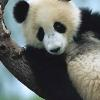

89.11% : giant panda
 0.78% : indri
 0.30% : lesser panda
 0.15% : custard apple
 0.12% : earthstar
 0.09% : sea urchin
 0.05% : forklift
 0.05% : digital watch
 0.05% : gibbon
 0.05% : go-kart


In [7]:
image_path = os.path.join(inception.data_dir, 'cropped_panda.jpg')
classify(image_path)

## Interpretação dos Scores de Classificações 

A saída do modelo Inception é a denominada função Softmax, que também foi usada nas redes neurais que construímos anteriormente.

As saídas de softmax às vezes são chamadas de probabilidades porque estão entre zero e um, e também somam um, exatamente como probabilidades. Mas eles na verdade não são probabilidades no sentido tradicional da palavra, porque não provêm de experiências repetidas.

Talvez seja melhor chamar os valores de saída de uma rede neural para classificação de scores ou ranks, porque indicam quão fortemente a rede acredita que a imagem de entrada é de cada classe possível.

No exemplo acima, com a imagem de um panda, o modelo Inception deu uma pontuação muito alta de 89,23% para a classe panda, e as pontuações para as restantes 999 classes possíveis estavam abaixo de 1%. Isso significa que o modelo do Inception tem certeza de que a imagem mostrou um panda e os escores restantes abaixo de 1% devem ser considerados como ruído. Por exemplo, a 10ª pontuação mais alta foi 0,05% para um relógio digital, mas isso provavelmente é mais devido à natureza imprecisa das redes neurais, em vez de uma indicação de que a imagem parecia um pouco como um relógio digital.

Às vezes, o modelo Inception fica confuso sobre a qual classe pertence uma imagem, de modo que nenhuma das pontuações é realmente alta. Exemplos disso são mostrados abaixo.

## Arara (Imagem Original)

O modelo Inception está muito confiante (pontuação 97.30%) que esta imagem mostra um tipo de Arara chamado Macaw.

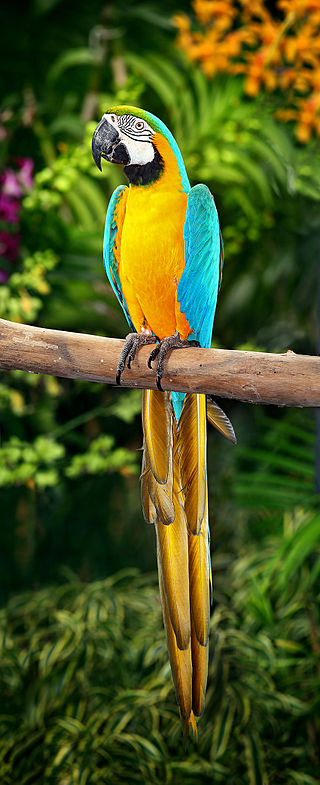

97.18% : macaw
 0.07% : African grey
 0.06% : toucan
 0.05% : jacamar
 0.04% : bee eater
 0.03% : lorikeet
 0.02% : sulphur-crested cockatoo
 0.02% : jay
 0.01% : kite
 0.01% : indigo bunting


In [8]:
classify(image_path = "images/parrot.jpg")

## Arara (Imagem Redimensionada)

O modelo Inception funciona em imagens de entrada com 299 x 299 pixels de tamanho. A imagem acima de uma Arara é na verdade 320 pixels de largura e 785 pixels de alta, por isso é redimensionada automaticamente pelo modelo Inception. 

Agora queremos ver a imagem depois de ter sido redimensionada pelo modelo Inception.

Primeiro, temos uma função auxiliar para obter a imagem redimensionada do modelo Inception.

In [9]:
def plot_resized_image(image_path):
    resized_image = model.get_resized_image(image_path=image_path)

    plt.imshow(resized_image, interpolation='nearest')
    
    plt.show()

Agora plotamos a imagem redimensionada da Arara. Esta é a imagem que é realmente entrada para a rede neural do modelo Inception. Podemos ver que foi espremido por isso é retangular, e a resolução foi reduzida para que a imagem tenha se tornado mais pixelada e granulada.

Neste caso, a imagem ainda mostra claramente uma Arara, mas algumas imagens podem ficar tão distorcidas com esse redimensionamento ingênuo que você pode querer redimensionar as imagens antes de inseri-las no modelo Inception.

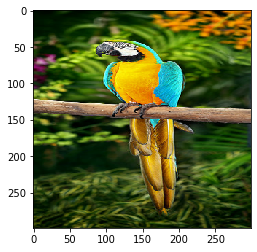

In [10]:
plot_resized_image(image_path="images/parrot.jpg")

## Arara (Cropped Image, Top)

Esta imagem da Arara foi cortada manualmente para 299 x 299 pixels e, em seguida, inserida no modelo Inception, que ainda está muito confiante (pontuação 97,38%) que mostra uma Arara (macaw).

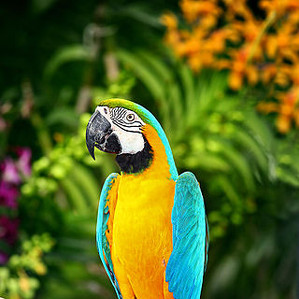

97.52% : macaw
 0.09% : African grey
 0.03% : sulphur-crested cockatoo
 0.02% : toucan
 0.02% : reflex camera
 0.01% : comic book
 0.01% : backpack
 0.01% : bib
 0.01% : vulture
 0.01% : lens cap


In [11]:
classify(image_path="images/parrot_cropped1.jpg")

## Arara (Cropped Image, Middle)

Este é outro crop da imagem da Arara, desta vez mostrando seu corpo sem a cabeça ou a cauda. O modelo de Inception segue confiante (pontuação 93,94%) que mostra uma Arara de Macaw.

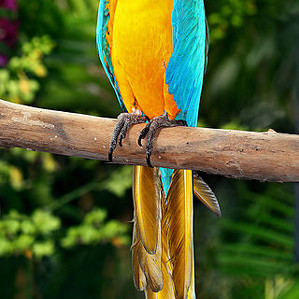

94.21% : macaw
 0.76% : toucan
 0.58% : African grey
 0.11% : jacamar
 0.10% : sulphur-crested cockatoo
 0.10% : bee eater
 0.09% : magpie
 0.08% : jay
 0.06% : lorikeet
 0.04% : hornbill


In [12]:
classify(image_path="images/parrot_cropped2.jpg")

## Arara (Cropped Image, Bottom)

Esta imagem foi cortada para que apenas mostre a cauda da Arara. Agora o modelo do Inception está bastante confuso e pensa que a imagem pode mostrar um jacamar (score 26.11%) que é outro pássaro exótico, ou talvez a imagem mostre um grass-hopper (pontuação 10.61%).

O modelo Inception também pensa que a imagem pode mostrar uma caneta-fonte (score 2.00%). Mas esta é uma pontuação muito baixa e deve ser interpretada como ruído não confiável.

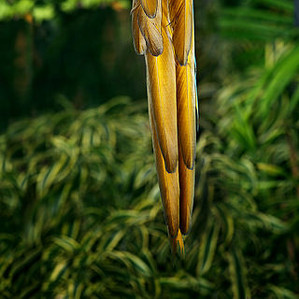

26.51% : jacamar
10.56% : grasshopper
 3.58% : chime
 2.15% : bulbul
 1.93% : fountain pen
 1.64% : leafhopper
 1.31% : kite
 1.22% : cricket
 1.09% : macaw
 0.81% : bee eater


In [13]:
classify(image_path="images/parrot_cropped3.jpg")

## Arara (Padded Image)

A melhor maneira de inserir imagens neste modelo de Inception é preencher a imagem para que seja retangular e redimensionar a imagem para 299 x 299 pixels, como este exemplo da Arara que está classificado corretamente com uma pontuação de 96,78%.

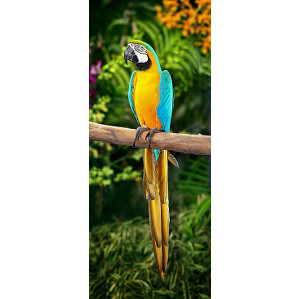

96.87% : macaw
 0.06% : African grey
 0.06% : toucan
 0.05% : bee eater
 0.04% : sulphur-crested cockatoo
 0.03% : king penguin
 0.03% : jacamar
 0.03% : lorikeet
 0.01% : kite
 0.01% : anemone fish


In [14]:
classify(image_path="images/parrot_padded.jpg")

## Elon Musk (299 x 299 pixels)

Esta imagem mostra a lenda viva e o super-nerd-hero Elon Musk. Mas o modelo do Inception está muito confuso sobre o que a imagem mostra, prevendo que talvez mostre uma camisola (score 19.73%) ou um abaya (pontuação 16.82%). Também pensa que a imagem pode mostrar uma bola de ping-pong (pontuação 3,05%) ou uma baseball (pontuação 1,86%). Assim, o modelo de Inception está confuso e os escores de classificação não são confiáveis.

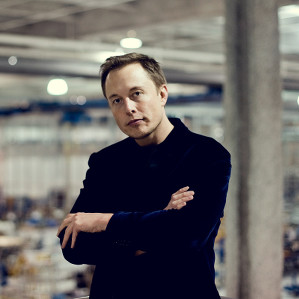

16.63% : sweatshirt
16.45% : abaya
 4.62% : suit
 3.40% : ping-pong ball
 2.89% : trench coat
 2.37% : baseball
 2.31% : cellular telephone
 1.99% : jersey
 1.42% : water bottle
 1.34% : dumbbell


In [15]:
classify(image_path="images/elon_musk.jpg")

## Elon Musk (100 x 100 pixels)

Se, em vez disso, usamos uma imagem de 100 x 100 pixels de Elon Musk, então o modelo Inception pensa que pode mostrar uma camisola (17,85%) ou uma bota de cowboy (pontuação 16,36%). Então, agora, o modelo de Inception tem previsões algo diferentes, mas ainda está muito confuso.

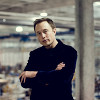

21.65% : sweatshirt
14.51% : cowboy boot
 9.11% : abaya
 8.70% : balance beam
 5.92% : suit
 5.65% : Loafer
 3.66% : trench coat
 1.75% : maillot
 1.44% : jersey
 1.44% : unicycle


In [16]:
classify(image_path="images/elon_musk_100x100.jpg")

O modelo de Inception aprimora automaticamente esta imagem de 100 x 100 a 299 x 299 pixels, o que é mostrado aqui. Observe como pixelado e granulado é realmente, embora um ser humano possa facilmente ver que esta é uma imagem de um homem com braços cruzados.

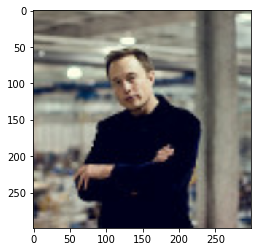

In [17]:
plot_resized_image(image_path="images/elon_musk_100x100.jpg")

## Willy Wonka (Gene Wilder)

Esta imagem mostra o ator Gene Wilder retratando Willy Wonka na versão de 1971 do filme. O modelo do Inception está muito confiante de que a imagem mostra uma gravata (pontuação 97.22%), o que é verdade, mas um ser humano provavelmente diria que esta imagem mostra uma pessoa.

A razão pode ser que o modelo do Inception tenha sido treinado em imagens de pessoas com gravatas que foram classificadas como uma gravata e não uma pessoa. Então talvez o problema seja que o nome da classe deve ser "pessoa com gravata" em vez de apenas "gravata".

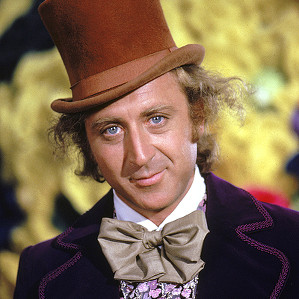

97.98% : bow tie
 0.63% : cowboy hat
 0.14% : sombrero
 0.07% : suit
 0.05% : bolo tie
 0.04% : Windsor tie
 0.03% : cornet
 0.02% : flute
 0.02% : banjo
 0.01% : revolver


In [18]:
classify(image_path="images/willy_wonka_old.jpg")

## Willy Wonka (Johnny Depp)

Esta imagem mostra o ator Johnny Depp retratando Willy Wonka na versão 2005 do filme. O modelo Inception pensa que esta imagem mostra "óculos de sol" (pontuação de 31,48%) ou "óculos de sol" (pontuação 18,77%). Na verdade, o nome completo da primeira classe é "óculos de sol, óculos escuros, sombras". Por algum motivo, o modelo inicial foi treinado para reconhecer duas classes muito semelhantes para óculos de sol. Mais uma vez, é correto que a imagem mostre óculos de sol, mas um humano provavelmente teria dito que essa imagem mostra uma pessoa.


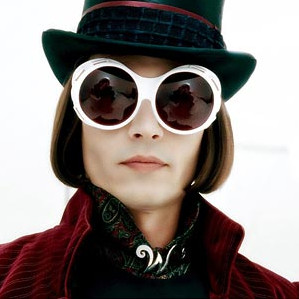

34.47% : sunglasses
18.10% : sunglass
 1.29% : velvet
 0.95% : wig
 0.85% : cowboy hat
 0.72% : sombrero
 0.64% : seat belt
 0.50% : jean
 0.44% : stole
 0.41% : poncho


In [19]:
classify(image_path="images/willy_wonka_new.jpg")

## Encerrando a Sessão TensorFlow

In [23]:
model.close()

## Conclusão

Este jupyter notebook mostrou como usar o modelo pré-treinado Inception v3. Demora várias semanas para um monster-computer treinar o modelo Inception, mas podemos simplesmente baixar o modelo final da internet e usá-lo em um PC normal para classificar imagens.

Infelizmente, o modelo de Inception parece ter problemas para reconhecer as pessoas. Isso pode ser devido ao conjunto de treinamento que foi usado. As versões mais recentes do modelo Inception já foram lançadas, mas provavelmente também são treinadas no mesmo conjunto de dados e, portanto, também podem ter problemas para reconhecer as pessoas. Futuros modelos serão esperançosamente treinados para reconhecer objetos comuns, como pessoas.

A implementação do TensorFlow está no arquivo `inception.py`. Esperemos que os desenvolvedores da TensorFlow padronizem e simplifiquem a API para carregar esses modelos pré-treinados com mais facilidade, de modo que qualquer pessoa possa usar um classificador de imagem poderoso com apenas algumas linhas de código.

## Exercícios

Estas são algumas sugestões para exercícios que podem ajudar a melhorar suas habilidades com TensorFlow. É importante obter experiência prática com o TensorFlow para aprender a usá-lo corretamente.

Você pode querer fazer backup desse Notebook e dos outros arquivos antes de fazer qualquer alteração.

* Use suas próprias imagens ou imagens que você encontra na internet.
* Corte, redimensione e distorça as imagens para ver como ela afeta a precisão da classificação.
* Adicione instruções de impressão a vários locais no código para ver quais dados estão sendo transmitidos no código. Você também pode executar e depurar o arquivo `inception.py` diretamente.
* Tente e use um dos [modelos mais recentes] (https://github.com/google/inception) que acabaram de ser lançados. Estes são carregados de forma diferente do modelo Inception v3 e podem ser mais desafiadores para implementar.
* Explique a um amigo como o programa funciona.

# Fim